# Capstone Project 1: Customer Churn Prediction for T-Mobile (Compulsory) #

**Step 1: Import Required Libraries**

In [89]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, 
                             precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc)
import streamlit as st

In [18]:
# pip install dash

**Step 2: Load the data**

In [91]:
# Step 2: Load Dataset
file_path = r'C:\Users\ssing\OneDrive\Desktop\Capstone Project1\T-Customer data.csv'
data = pd.read_csv(file_path)

**Step 3: Data Preprocessing**

In [93]:
# Step 3: Data Preprocessing
## Remove duplicate rows
data = data.drop_duplicates()

In [95]:
## Convert TotalCharges to numeric and handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\ssing\AppData\Local\Temp\ipykernel_36912\3822269968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [97]:
## Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [99]:
## Scale numerical variables
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [101]:
# Check basic information
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-n

In [74]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Step 4: Split the Data**

In [103]:
# Step 4: Split the Data
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 5: Train Models**

***Logistic Regression***

In [ ]:
## Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
log_reg_acc = accuracy_score(y_test, log_reg_preds)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)

***Random Forest***

In [ ]:
## Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_acc = accuracy_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_probs)

***Gradient Boosting***

In [ ]:
## Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
gb_probs = gb.predict_proba(X_test)[:, 1]
gb_acc = accuracy_score(y_test, gb_preds)
gb_auc = roc_auc_score(y_test, gb_probs)

**Step 6: Evaluation Metrics**

In [116]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [log_reg_acc, rf_acc, gb_acc]
auc_scores = [log_reg_auc, rf_auc, gb_auc]
precisions = [precision_score(y_test, log_reg_preds), precision_score(y_test, rf_preds), precision_score(y_test, gb_preds)]
recalls = [recall_score(y_test, log_reg_preds), recall_score(y_test, rf_preds), recall_score(y_test, gb_preds)]
f1_scores = [f1_score(y_test, log_reg_preds), f1_score(y_test, rf_preds), f1_score(y_test, gb_preds)]

**Step 7: Confusion Matrices**

In [119]:
conf_matrices = {
    "Logistic Regression": confusion_matrix(y_test, log_reg_preds),
    "Random Forest": confusion_matrix(y_test, rf_preds),
    "Gradient Boosting": confusion_matrix(y_test, gb_preds)
}

**Step 8: Visualization - Each Model's Performance**

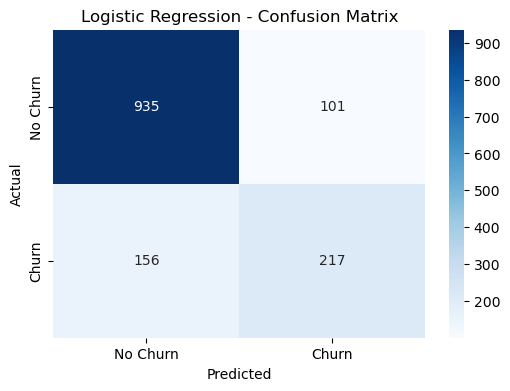

In [122]:
## Logistic Regression - Heatmap of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrices["Logistic Regression"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest - Bar Graph for Precision, Recall, and F1 Score**

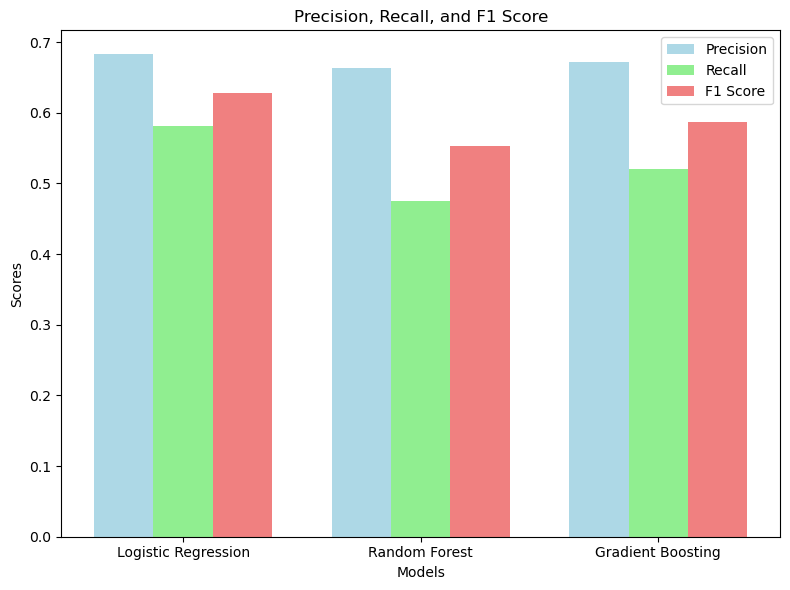

In [125]:
## Random Forest - Bar Graph for Precision, Recall, and F1 Score
plt.figure(figsize=(8, 6))
bar_width = 0.25
index = np.arange(len(models))
plt.bar(index, [precisions[0], precisions[1], precisions[2]], bar_width, label='Precision', color='lightblue')
plt.bar(index + bar_width, [recalls[0], recalls[1], recalls[2]], bar_width, label='Recall', color='lightgreen')
plt.bar(index + 2 * bar_width, [f1_scores[0], f1_scores[1], f1_scores[2]], bar_width, label='F1 Score', color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score')
plt.xticks(index + bar_width, models)
plt.legend()
plt.tight_layout()
plt.show()

**Gradient Boosting - Scatter Plot of Predicted vs Actual**

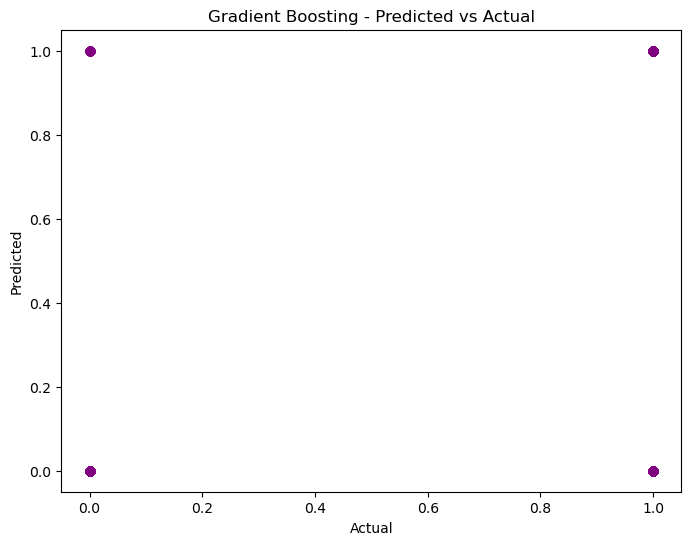

In [128]:
## Gradient Boosting - Scatter Plot of Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds, color='purple', alpha=0.5)
plt.title('Gradient Boosting - Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Step 9: Model Comparison in Bar Graph with Different Colors**

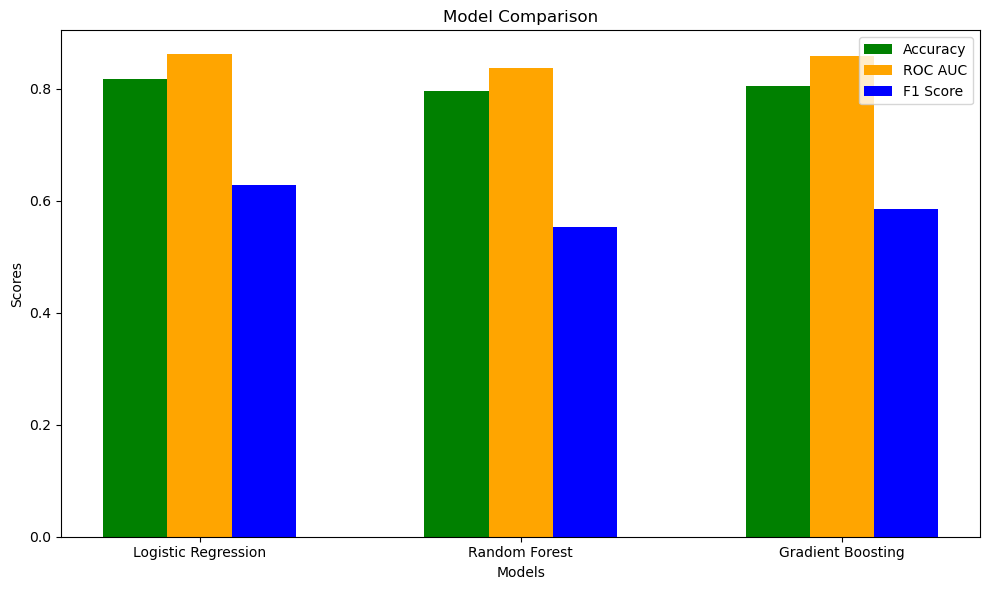

In [131]:
# Step 9: Model Comparison in Bar Graph with Different Colors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(models))

plt.bar(index, accuracies, bar_width, label='Accuracy', color='green')
plt.bar(index + bar_width, auc_scores, bar_width, label='ROC AUC', color='orange')
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='blue')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks(index + bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()

**Step 10: Visualization - ROC Curves**

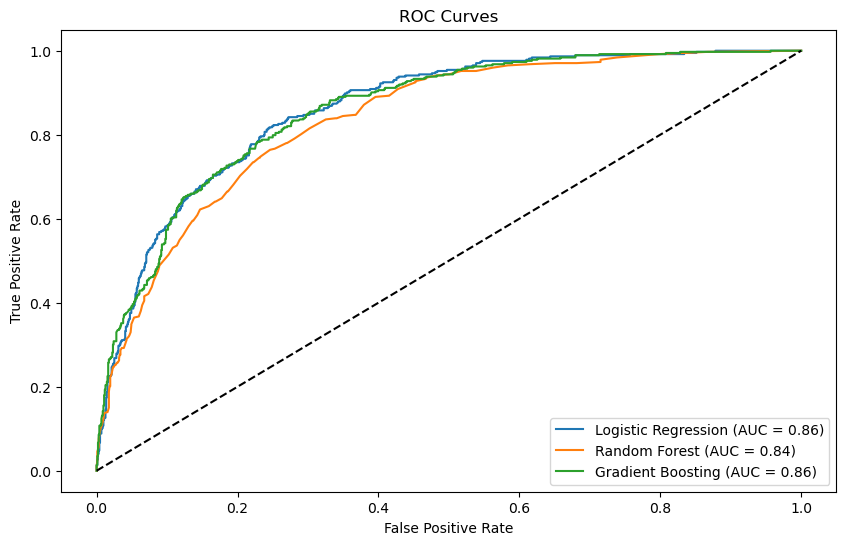

In [134]:
# Step 10: Visualization - ROC Curves
plt.figure(figsize=(10, 6))
models_probs = [log_reg_probs, rf_probs, gb_probs]
for i, probs in enumerate(models_probs):
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{models[i]} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Step 11: Interactive Dashboard**

In [137]:
st.title("Customer Churn Analysis Dashboard")

2024-12-30 15:56:12.652 
  command:

    streamlit run C:\Users\ssing\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [139]:
## Display data metrics
st.write("### Data Metrics")
st.write(data.describe())

In [141]:
## Visualizations
st.write("### Churn Distribution")
st.bar_chart(data['Churn'].value_counts())

DeltaGenerator()

In [143]:
## Model performance
st.write("### Model Performance")
st.table({
    "Model": models,
    "Accuracy": accuracies,
    "AUC": auc_scores,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
})

DeltaGenerator()

DeltaGenerator()

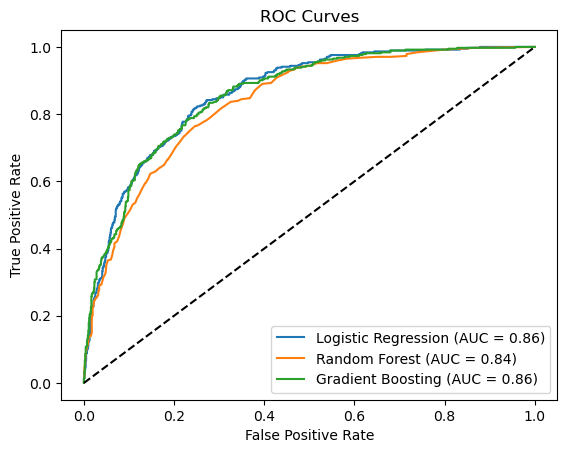

In [145]:
## Add interactive visualization for ROC Curves
st.write("### ROC Curves")
fig, ax = plt.subplots()
for i, probs in enumerate(models_probs):
    fpr, tpr, _ = roc_curve(y_test, probs)
    ax.plot(fpr, tpr, label=f'{models[i]} (AUC = {auc_scores[i]:.2f})')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_title('ROC Curves')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
st.pyplot(fig)